#NEURAL NETWORKS

#Data Exploration and Preprocessing

In [5]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/Alphabets_data.csv")
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
df['letter'] = label_encoder.fit_transform(df['letter'])

# Display the first few rows with the new encoded column
display(df.head())

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [8]:
df.isnull().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


#Model Implementation

In [12]:
from sklearn.model_selection import train_test_split
x=df.drop('letter',axis=1)
y=df['letter']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
import tensorflow as tf
from tensorflow import keras

#define the model
model = keras.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),  # Input layer
    keras.layers.Dense(24, activation='relu'),  # Hidden layer with 24 units and ReLU activation
    keras.layers.Dense(26, activation='softmax')  # Output layer with 26 neurons (for 26 classes) and softmax activation
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
#train the model
history=model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9292 - loss: 0.2193 - val_accuracy: 0.9130 - val_loss: 0.2920
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9350 - loss: 0.2095 - val_accuracy: 0.9120 - val_loss: 0.2957
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9312 - loss: 0.2113 - val_accuracy: 0.9110 - val_loss: 0.2930
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9312 - loss: 0.2128 - val_accuracy: 0.9135 - val_loss: 0.2917
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9337 - loss: 0.2102 - val_accuracy: 0.9137 - val_loss: 0.2923
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9332 - loss: 0.2176 - val_accuracy: 0.9122 - val_loss: 0.2912
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9296 - loss: 0.2198 - val_accuracy: 0.9112 - val_loss: 0.2945
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9314 - loss: 0.2166 - val_accu

#Evaluation

In [31]:
#evaluate the model
loss,accuracy=model.evaluate(x_test,y_test)
print(f"Test Accuracy:{accuracy*100:.2f}%")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9108 - loss: 0.3041
Test Accuracy:91.45%


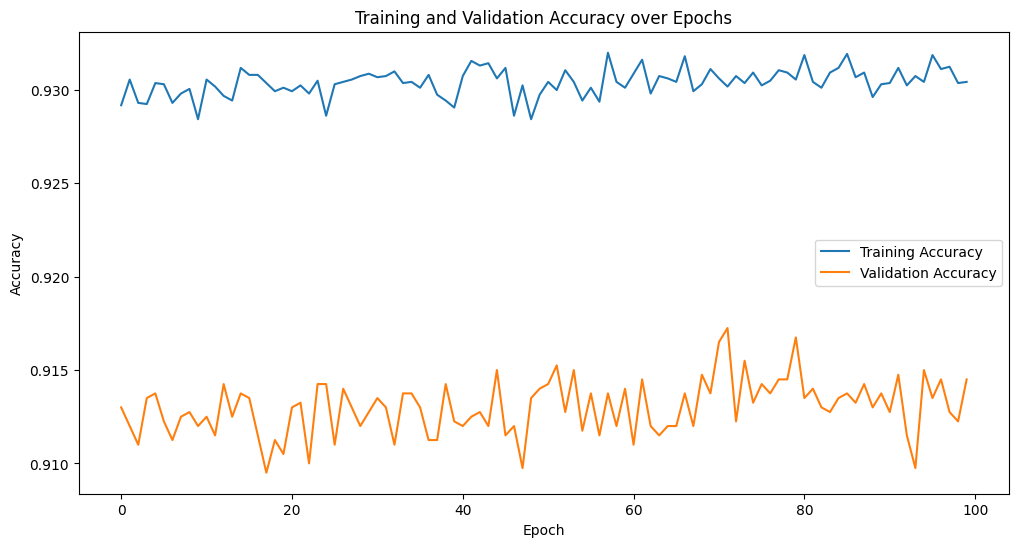

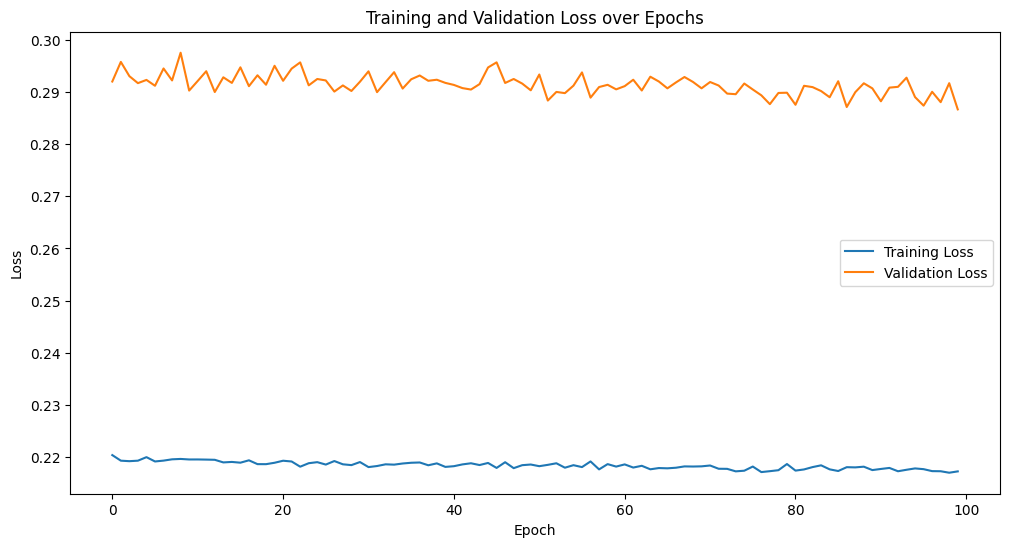

In [32]:
import matplotlib.pyplot as plt
#access the training and validation loss from the history object
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs=range(1,len(train_loss)+1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Hyperparameter Tuning

In [22]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.7 MB/s eta 0:00:00


In [23]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(x_train.shape[1],)))
    model.add(keras.layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(keras.layers.Dense(len(y.unique()), activation='softmax'))

    optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [25]:
from keras_tuner import RandomSearch

# Instantiate RandomSearch tuner
tuner = RandomSearch(
    hypermodel=build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_tuning_dir',
    project_name='alphabet_classification'
)

# Start the hyperparameter search
tuner.search(x_train, y_train, validation_data=(x_test, y_test))

Trial 10 Complete [00h 00m 05s]
val_accuracy: 0.4860000014305115

Best val_accuracy So Far: 0.7964999973773956
Total elapsed time: 00h 00m 55s


In [26]:
# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Display the model summary
best_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 320)            │         5,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         8,346 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,786 (53.85 KB)

 Trainable params: 13,786 (53.85 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Evaluate the best model on the test set
loss, accuracy = best_model.evaluate(x_test, y_test)

# Print the evaluation results
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8011 - loss: 0.7647
Test Loss: 0.7711
Test Accuracy: 79.77%


* Based on the performance of both the models ,the one with the default parameters and the one with the hyperparameter tuning the first model has been recorded with the highest accuracy score and lowest log loss, so the first model with parameters like "relu" and "softmax" activation functions and "adam" optmizer with "sparse categorical crossentopy" loss and metrics like accuracy has given us better results so that model can be finalized because it has 91.45% accuractely classified the alphabets.